In [2]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [7]:
# #create a set of random latitue and longitude combinations
# #zip creates a tuple of the respective index for lat and lngs
# lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# lngs = np.random.uniform(low=-180.000, high = 180.000, size=1500)
# lat_lngs = zip(lats,lngs)
# lat_lngs

In [3]:
# #add the coordinates to a list
# coordinates=list(lat_lngs)

In [8]:
# # Create a list for holding the cities
# cities=[]

# #identify the nearest city for each latititude and longitude combo

# for coordinate in coordinates:
#     city= citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
#     #if the city is unique, then add it to the cities list
#     if city not in cities:
#         cities.append(city)

# #print the city count to confirm sufficient count
# len(cities)

6.2.6 Get the city weather data

In [10]:
#import the time library and datetime module from the datetime library
import time
from datetime import datetime

In [75]:
# import the requests library
import requests

#import the API key
from config import weather_api_key

In [14]:
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
# #6.2.6 Get the city weather


# #create an empty list to hold the weather data
# city_data = []

# #print the beginning of the logging
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# #create counters.
# record_count = 1
# set_count = 1

# # Loop through all the cities in the list.
# for i, city in enumerate(cities):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + city.replace(" ","+")

#     # Log the URL, record, and set numbers and the city.
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")
#     # Add 1 to the record count.
#     record_count += 1

# # Run an API request for each of the cities.
#     try:
#         # Parse the JSON and retrieve data.
#         city_weather = requests.get(city_url).json()
#         # Parse out the needed data.
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # Append the city information into city_data list.
#         city_data.append({"City": city.title(),
#                           "Lat": city_lat,
#                           "Lng": city_lng,
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

# # If an error is experienced, skip the city.
#     except:
#         print("City not found. Skipping...")
#         pass

# # Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [20]:
# # Convert the array of dictionaries to a Pandas DataFrame.
# city_data_df = pd.DataFrame(city_data)


In [4]:
# new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

# city_data_df = city_data_df[new_column_order]
# city_data_df.head()

In [21]:
# #Create an output 
# output_data_file = 'weather_data/cities.csv'

# #explort
# city_data_df.to_csv(output_data_file, index_label="City_ID")

In [5]:
#import CSV File so I don't have to re-run the huge file
file_to_load = "weather_data/cities.csv"
city_data_df = pd.read_csv(file_to_load)

In [11]:
#extract relevant fields from the datafram for plotting
lats = city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df["Wind Speed"]

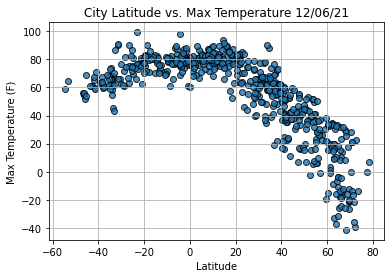

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

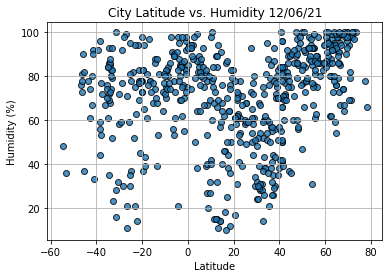

1638803570.2209918

In [19]:
#6.3.2
#Import time module
import time

#build the scatter plot for latitude vs max temp.
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

#get today's date in seconds
today = time.time()
today


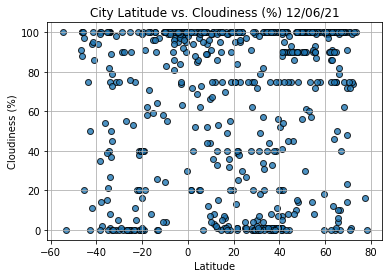

In [18]:
#6.3.3
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

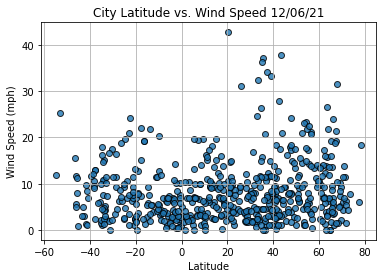

In [23]:
# 6.3.4
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.2 Linear Regression 

In [25]:

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
#Create northern and southern hemispheres data
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

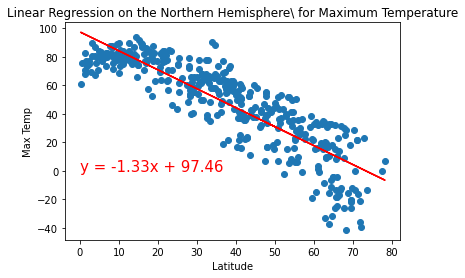

In [37]:
#Linear regression on the max temps
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere\ for Maximum Temperature", 'Max Temp', (0,0))

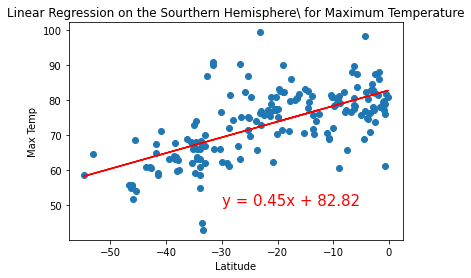

In [51]:
#Linear regression on the max temps
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Sourthern Hemisphere\ for Maximum Temperature", 'Max Temp', (-30,50))

### 6.4.3 Find correlation between latitude and percent humidity

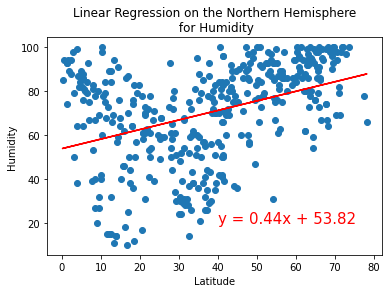

In [56]:
#Linear regression on the max temps
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere\n for Humidity", 'Humidity', (40,20))

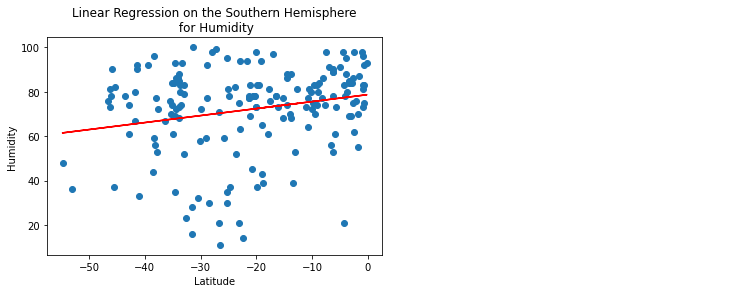

In [57]:
#Linear regression on the max temps
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere\n for Humidity", 'Humidity', (40,20))

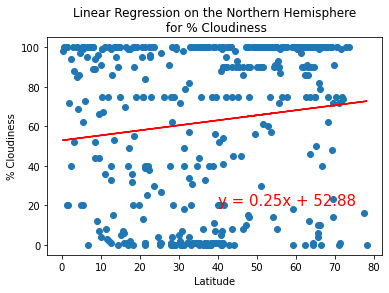

In [64]:
#Linear regression on the max temps
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere\n for % Cloudiness", '% Cloudiness', (40,20))

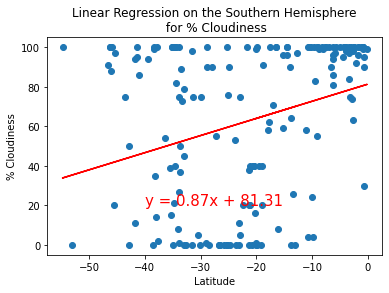

In [65]:
#Linear regression on the max temps
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere\n for % Cloudiness", '% Cloudiness', (-40,20))

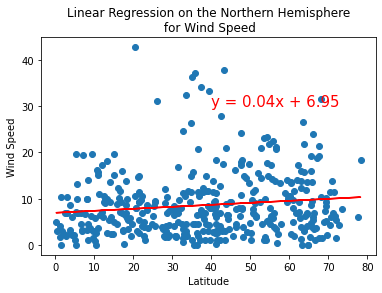

In [74]:
#Linear regression on the wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere\n for Wind Speed", 'Wind Speed', (40,30))

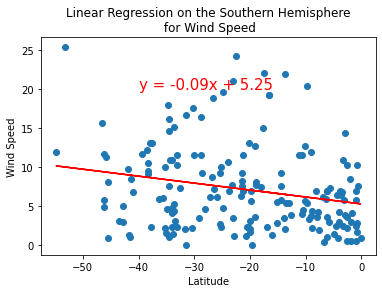

In [72]:
#Linear regression on the wind Speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#call the function 
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere\n for Wind Speed", 'Wind Speed', (-40,20))